# Homework 8:  Resampling methods

This homework assignment is designed to give you practice with bootstrapping and permutation tests.

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 

This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading & Visualizing the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

(a) Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`, self reported at time of data collection), Flanker Task performance (`Flanker_Unadj`), total intracranial volume (`FS_IntraCranial_Vol`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [25]:
library("tidyverse")
library("dplyr")
library("MASS")

library(ISLR)
library(boot)

setwd("/Users/jermondrake/Desktop/DataSciencePsychNeuro/Homeworks/hcp_data")
unrestricted_trimmed_1_7_2020_10_50_44 <- read_csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")
(d1 <- unrestricted_trimmed_1_7_2020_10_50_44[, c("Subject", "Gender", "Flanker_Unadj","FS_IntraCranial_Vol","FS_Tot_WM_Vol","FS_Total_GM_Vol")])
na.omit(d1) -> d1
head(d1)


Rows: 1206 Columns: 500
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (66): Release, Acquisition, Gender, Age, PSQI_BedTime, PSQI_GetUpTime, ...
dbl (434): Subject, MMSE_Score, PSQI_Score, PSQI_Comp1, PSQI_Comp2, PSQI_Com...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
100004,M,121.97,NA,NA,NA
100206,M,130.42,1864518,543134,807245
100307,F,112.56,1512540,407292,664124
100408,M,121.18,1684117,500417,726206
100610,M,126.53,1816044,512946,762308
101006,F,101.85,1437868,429449,579632
101107,M,107.04,1512727,416995,665024
101208,F,94.96,NA,NA,NA
101309,M,113.67,1540433,491221,707674


Subject,Gender,Flanker_Unadj,FS_IntraCranial_Vol,FS_Tot_WM_Vol,FS_Total_GM_Vol
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
100206,M,130.42,1864518,543134,807245
100307,F,112.56,1512540,407292,664124
100408,M,121.18,1684117,500417,726206
100610,M,126.53,1816044,512946,762308
101006,F,101.85,1437868,429449,579632
101107,M,107.04,1512727,416995,665024


(b) Plot grey matter volume (x axis) against intracranial volume (y axis) and Gender (point color). 

`geom_smooth()` using formula 'y ~ x'



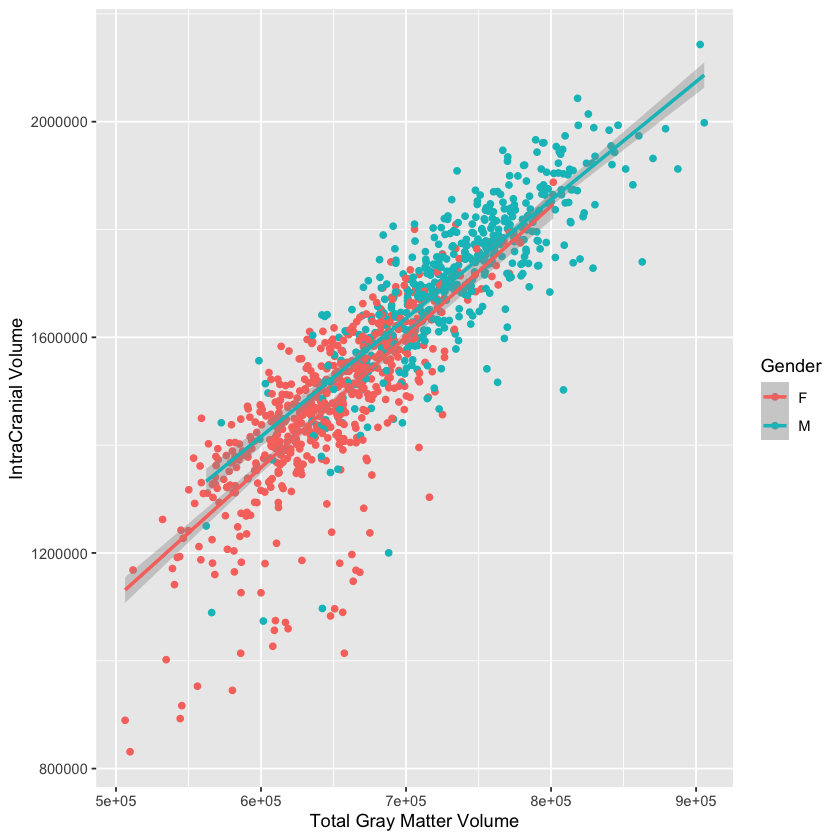

In [6]:
ggplot(d1, aes(x=FS_Total_GM_Vol, y=FS_IntraCranial_Vol, color=Gender)) +
  geom_point() +
  geom_smooth(method=lm, se=TRUE) +
  scale_x_continuous(name = "Total Gray Matter Volume" ) +
  scale_y_continuous(name = "IntraCranial Volume")

What patterns do you observe in the scatter plot?

1) Intracranial volume and total gray matter volume appear to be positively associated with eachother
2) Males tend to have greater intracranial volume and gray matter volume

---
## 2. Logistic classifier (2 points)

We want to try predicting gender using the neural data you have loaded.

(a) Run a logisic regression model to predict gender from total white matter volume, total grey matter volume, and intracranial volume. 

In [28]:
d1 <- d1 %>%
mutate(Gender = ifelse(Gender=="F", 1, 0))

glmfit=glm(Gender~FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data =d1, family=binomial) 
summary(glmfit)


Call:
glm(formula = Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, 
    family = binomial, data = d1)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2309  -0.5997   0.1863   0.6173   2.7695  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)          2.262e+01  1.347e+00  16.787  < 2e-16 ***
FS_Tot_WM_Vol       -2.140e-06  3.059e-06  -0.699    0.484    
FS_Total_GM_Vol     -1.959e-05  3.145e-06  -6.229 4.70e-10 ***
FS_IntraCranial_Vol -5.020e-06  1.177e-06  -4.263 2.01e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1534.13  on 1112  degrees of freedom
Residual deviance:  919.85  on 1109  degrees of freedom
AIC: 927.85

Number of Fisher Scoring iterations: 5


Which factors are signficantly associated with gender?

Gray matter volume and Intracranial volume 

(b) Estimate the prediction accuracy of your model (Note: this is the training set accuracy). Set your prediction threshold to 0.5.

In [29]:
glmprobdf = data.frame(predict(glmfit, type = "response"))
colnames(glmprobdf) = c('predicted_prob')

number_observations = nrow(glmprobdf)
glmprobdf$index = seq(1, number_observations) #get the observation number for plotting; ggplot does 

threshold = 0.50 #binarizing threshold 

# First make a list of "Males"
glmprobdf$predicted_binary=rep("0",number_observations)

# Now let's look at the prediction accuracy
glmprobdf$predicted_binary[glmprobdf$predicted_prob>threshold]="1" #find the rows that have prob > threshold and cast as 'up'

# Now let's look at the prediction accuracy
confusionn_df = data.frame(glmprobdf$predicted_binary, d1$Gender)

colnames(confusionn_df) = c('predicted', 'actual')

table(confusionn_df)

# We can calculate the prediction accuracy by counting the number of times our
# prediction vector matched the real data and taking the average
print(paste("Accuracy:",mean(confusionn_df$predicted == confusionn_df$actual)))



         actual
predicted   0   1
        0 397  90
        1 110 516

[1] "Accuracy: 0.820305480682839"


What is the prediction accuracy for gender from the full model?

0.820305480682839

---
## 3. Bootstrapped accuracy (3 points)

Use bootstrapping to estimate the confidence intervals of the _prediction accuracy_ of your model. Plot the histogram of the bootstrapped prediction accuracies and estimate the confidence intervals off of the standard deviation from the bootstrap.



ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = d1, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
     original       bias    std. error
t1* 0.8203055 -0.002075472 0.004588723


$names
 [1] "t0"        "t"         "R"         "data"      "seed"      "statistic"
 [7] "sim"       "call"      "stype"     "strata"    "weights"  

$class
[1] "boot"

$boot_type
[1] "boot"

[1] 0.8203055

[1] "95% confidence interval 0.8114005732 0.8292104268"


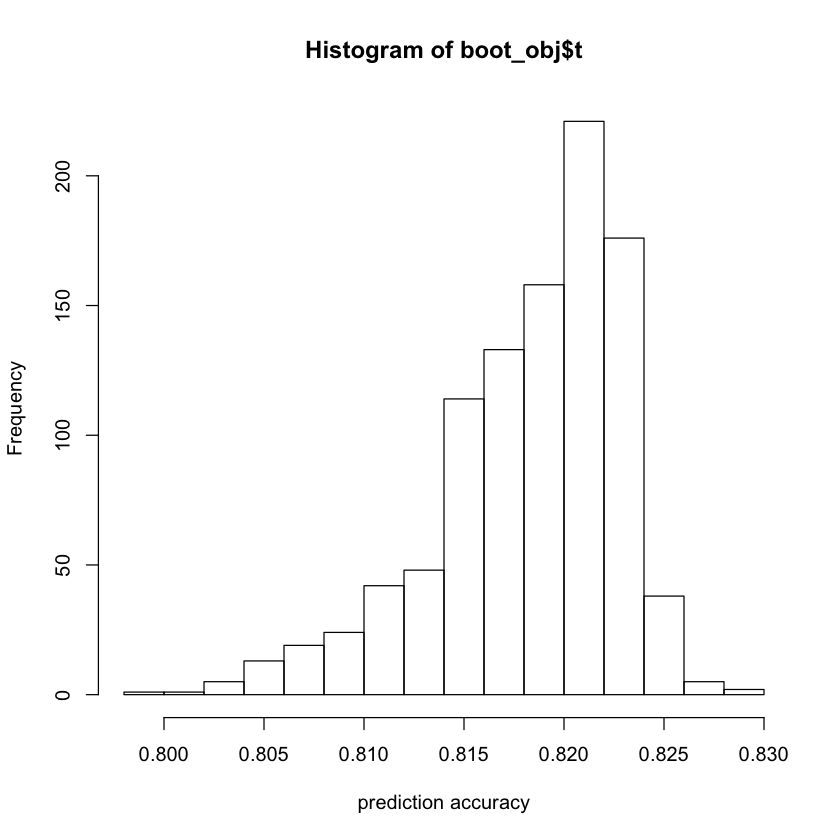

In [33]:

boot.fn <- function(data, index){
  ## Run logistic regression
  glmboot <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = d1, family = binomial,
                         subset = index)
  
  ## Use logistic regression model to generate probabilities
  glm.probs_boot=predict(glmboot, d1, type="response")

   glm.pred_boot=rep(0,nrow(d1))
  glm.pred_boot[glm.probs_boot>0.5]=1
  
  # Now let's look at the prediction accuracy
  confusion_df_boot = data.frame(glm.pred_boot, d1$Gender) 
  colnames(confusion_df_boot) = c('predicted', 'actual')
  
  return(mean(confusion_df_boot$predicted == confusion_df_boot$actual))
}

boot_obj = boot(d1, boot.fn, R = 1000)
print(boot_obj)
attributes(boot_obj)
boot_obj$t0

hist(boot_obj$t, xlab = "prediction accuracy")

CI =  0.00454333*1.96
print(paste("95% confidence interval", 0.8203055 - CI, 0.8203055 + CI))

How robust is the prediction accuracy of the full model?

The histogram of bootstrapped prediction accuracies suggest that the prediction accuracy of our logistic regression model is robust. Our prediction accuracy lies within the 95% confidence interval, and the confidence interval does not include "0".

---
## 4. Permutation test for grey matter effects (3 points)

Now run a permutation test, with 1000 iterations, to evaluate how much grey matter volume contributes to the prediction accuracy. Compare the prediction accuracy of the full (unpermuted model) with the distribution of accuracies you get with a randomized grey matter volume term using a histogram (Hint: use the `abline` function to show the original accuracy on the histogram).

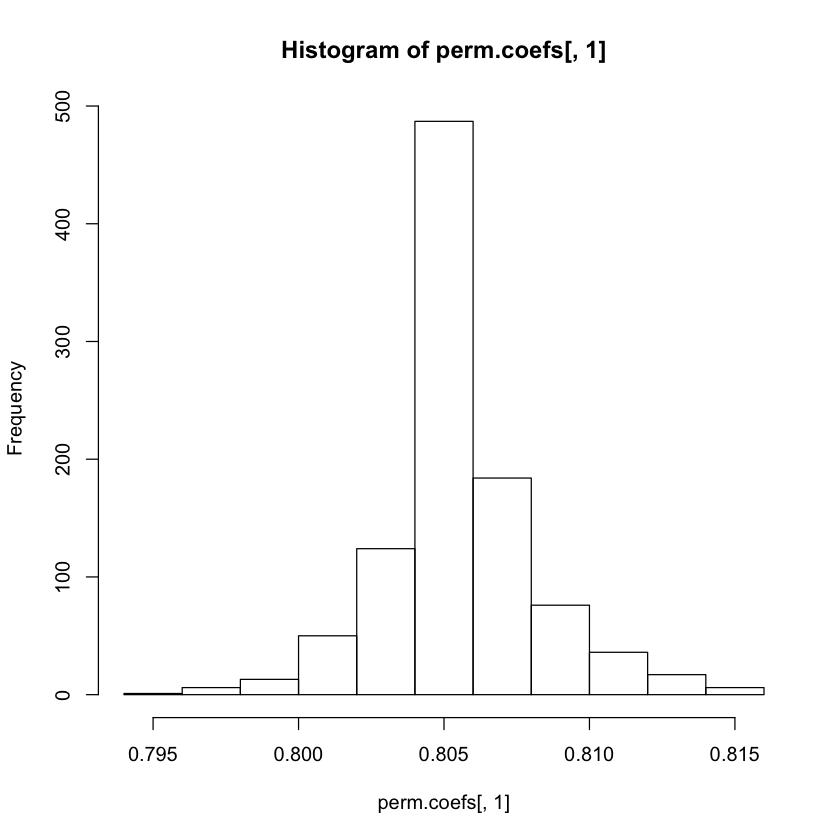

In [45]:
permmd1 = d1
permmd1_row <- nrow(permmd1)
## Set number of iterations
R = 1000
## Make output object to store results
perm.coefs=matrix(NA,nrow=R, ncol=1)

for (i in 1:R){
  permmd1$FS_Total_GM_Vol=d1$FS_Total_GM_Vol[sample(permmd1_row)]
  d1_glm_fit_perm <- glm(Gender ~ FS_Tot_WM_Vol + FS_Total_GM_Vol + FS_IntraCranial_Vol, data = permmd1, family = binomial)
  glm.probs_perm=predict(d1_glm_fit_perm, permmd1, type="response")
  glm.pred_perm=rep(0,nrow(permmd1))
  glm.pred_perm[glm.probs_perm>0.5]=1
  confusion_df_perm = data.frame(glm.pred_perm, permmd1$Gender) 
  colnames(confusion_df_perm) = c('predicted', 'actual')
  perm.coefs[i] <- mean(confusion_df_perm$predicted == confusion_df_perm$actual)
}

hist(perm.coefs[,1])

abline(v=0.820)

How much does the grey matter volume influence the prediction accuracy of the model?

Based on the plot, gray matter appears to significantly influence the prediction accuracy of gender. The prediction accuracy (.82) lies outside of the range of values we could see if the null hypothesis we true, and , as such, we can reject the null hypothesis that gray matter does not influence prediction accuracy.

---
## 5. Reflection (1 point)

Differentiate the bootstrap from a permutation test. Describe each and when is it appropriate to each.

Bootstrapping leverages sampling with replacement to generate plausible ranges we can expect our coefficient to fall within based on our data. 

Permutation testing leverages without replacement to break the relationship between varaibles of interest to generate. This generates a distribution of values we can expect to see if the null hypothesis tests is true (i.e. there is no relationship between x and y), and if our coefficient is outside of the range of values we would expect ot see if there is no relationship between x and y, we have evidence to reject the null hypothesis.

Generally both of these methods are good when you need to rely on non parametric approaches in the event your data do not meet certain assumptions.

**DUE:** 5pm EST, April 1, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*